In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [5]:
colors = ['#0476df', '#50b1ff', '#0458a5', '#88cbff', '#00457a', '#032a4d', '#9e9e9e', '#828282', '#0078d6']
sns.set_palette(sns.color_palette(colors))

In [6]:
# Load df
df = pd.read_csv("../data/cleaned_data.csv", low_memory=False)
df_legacy = pd.read_csv("../data/loan/loan.csv", low_memory=False)

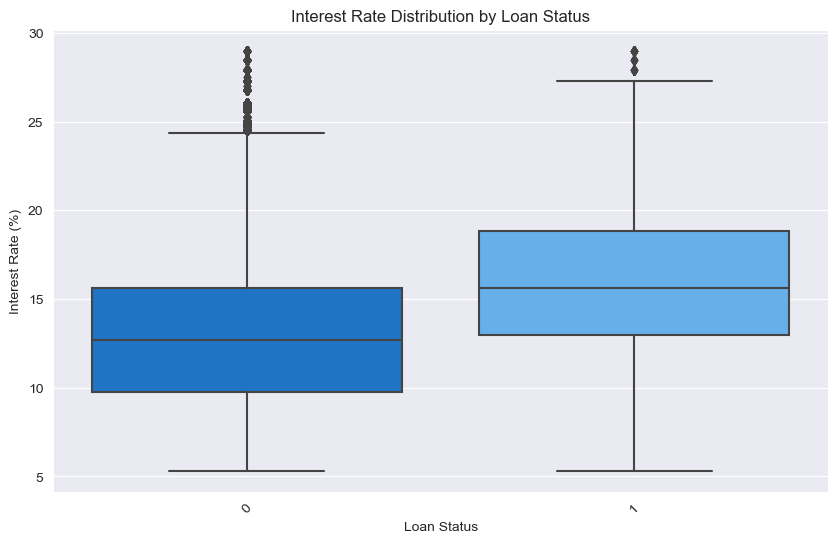

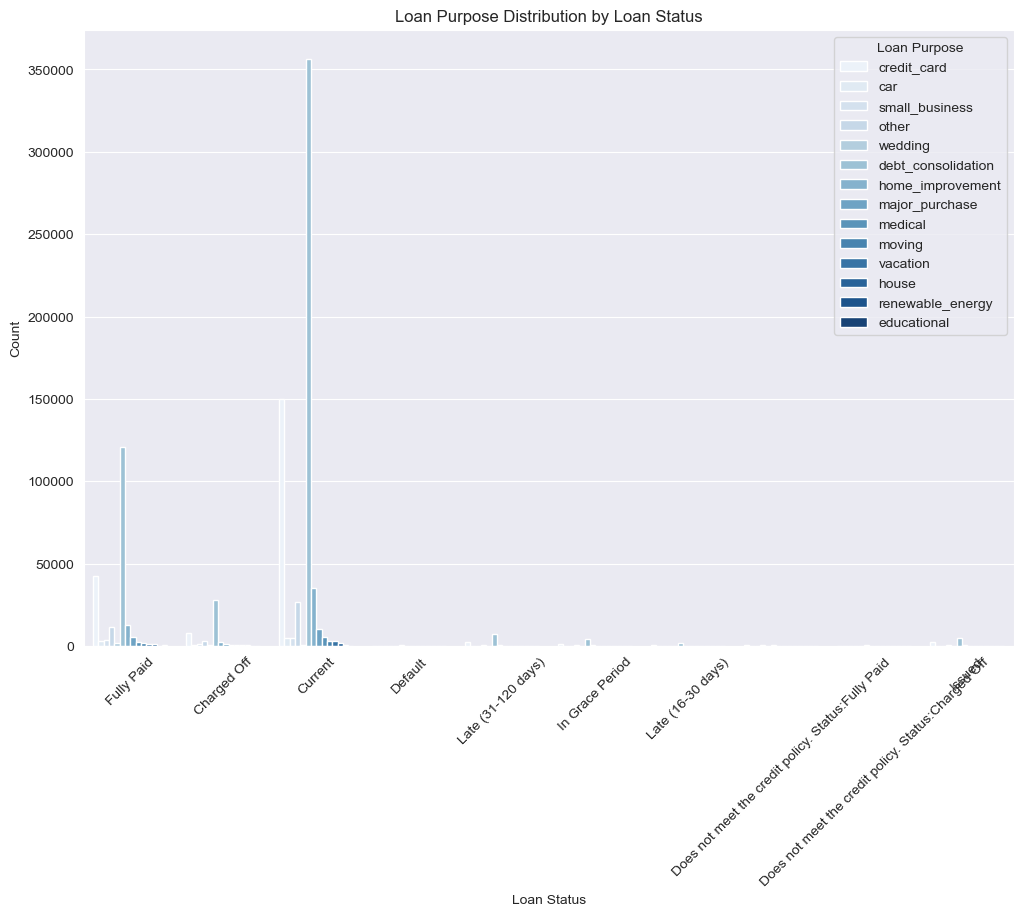

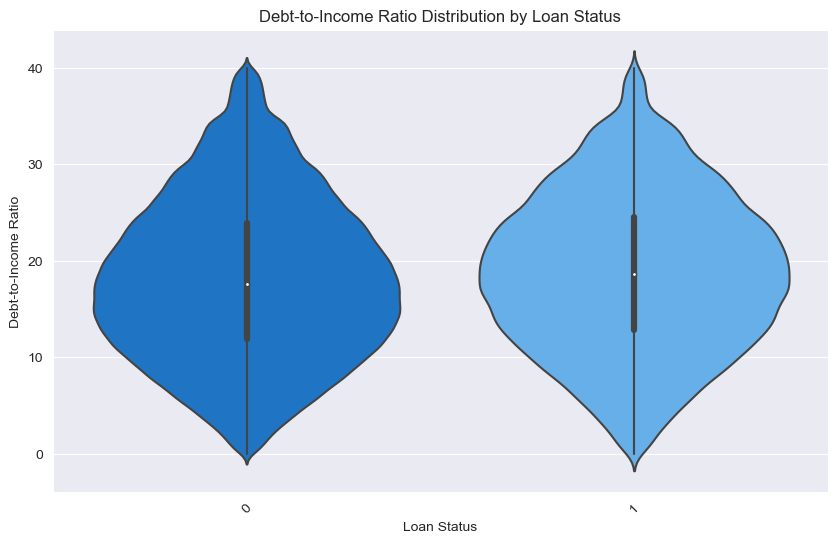

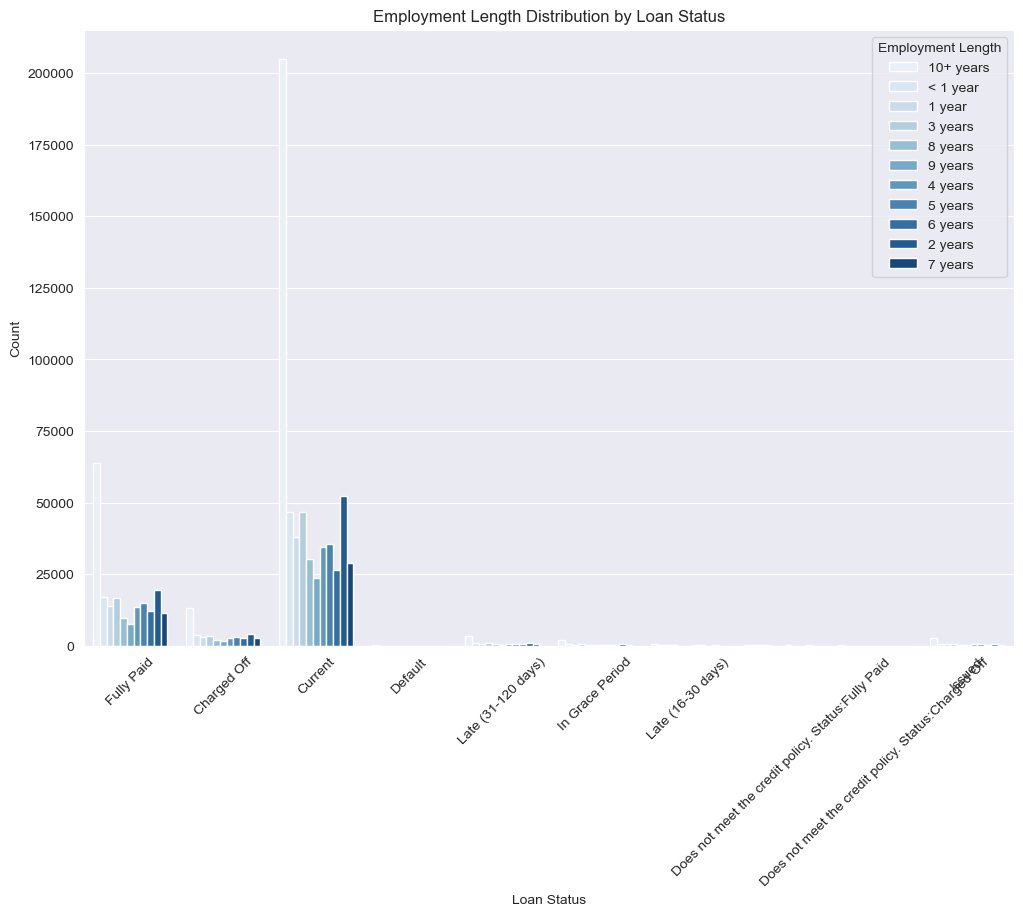

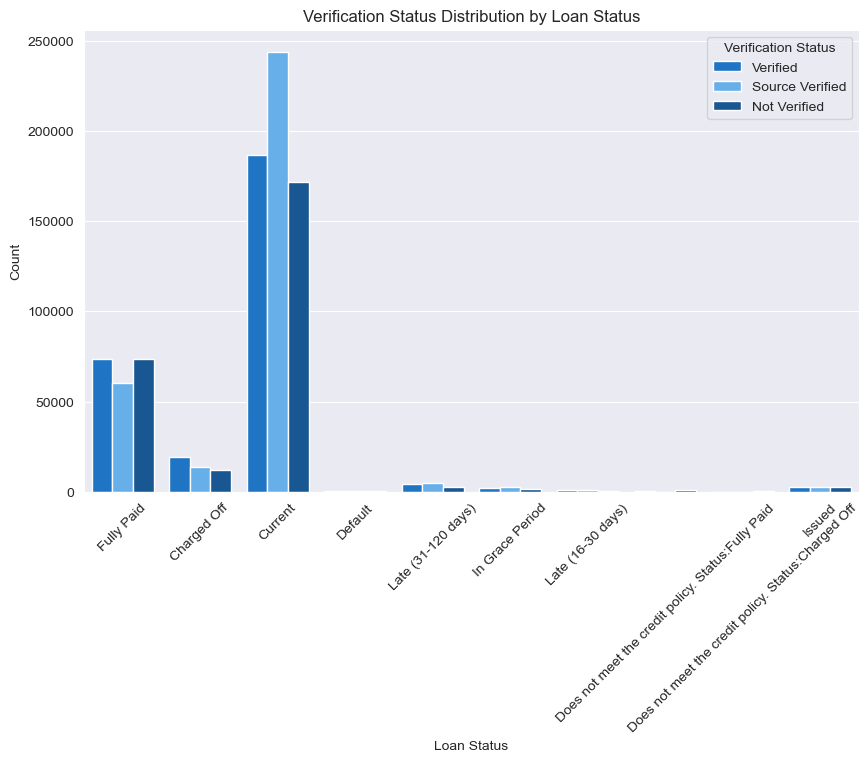

/Users/yelf/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


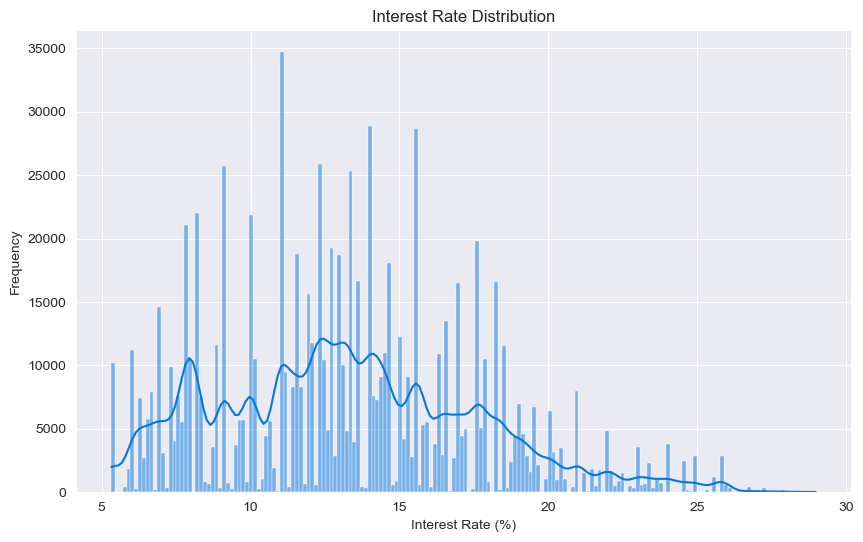

/Users/yelf/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


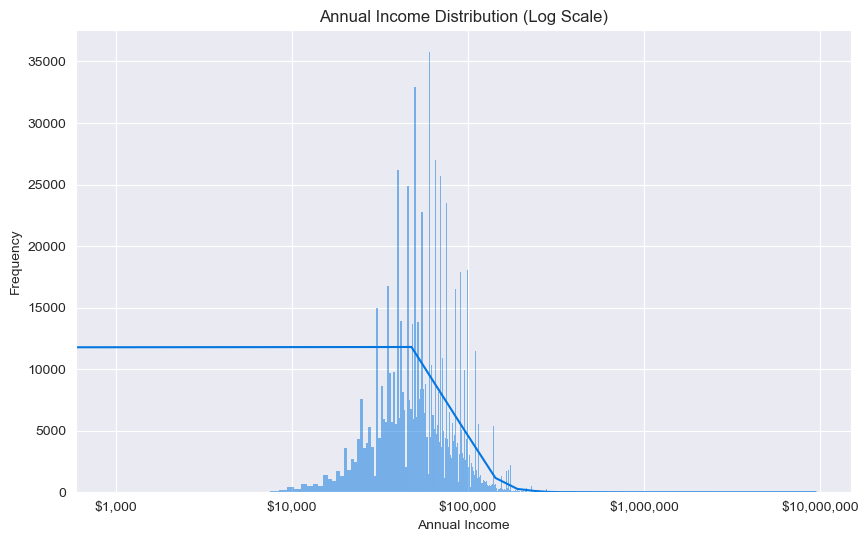

/Users/yelf/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


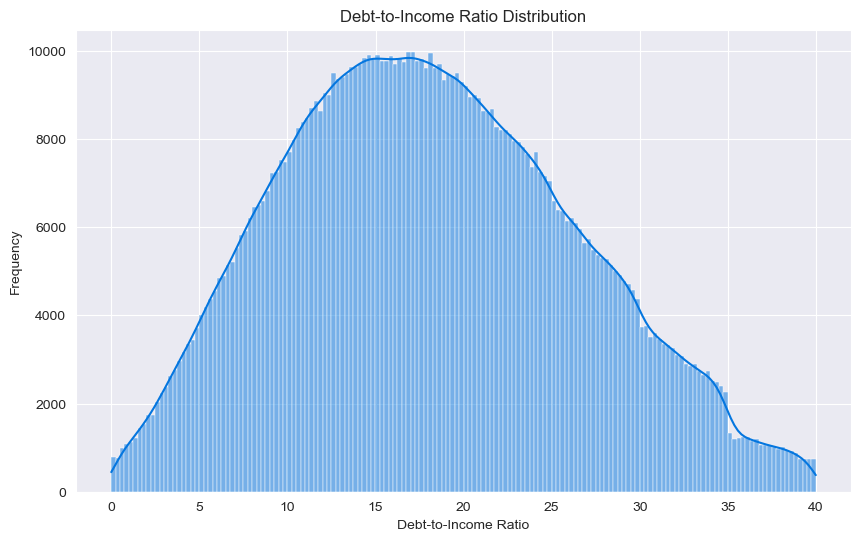

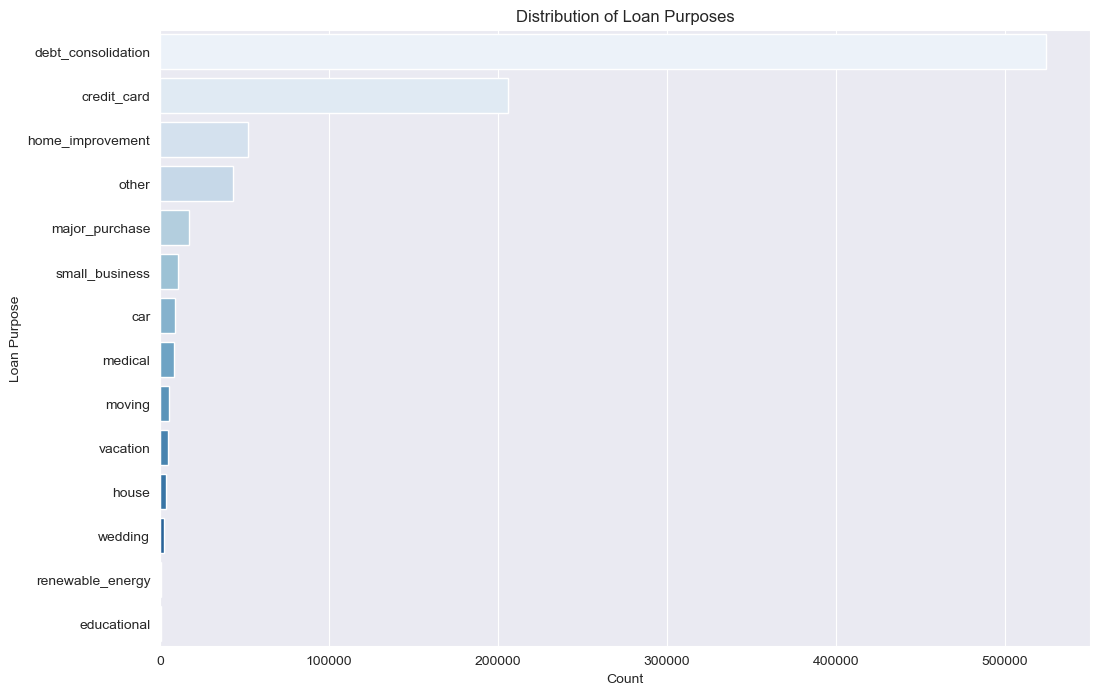

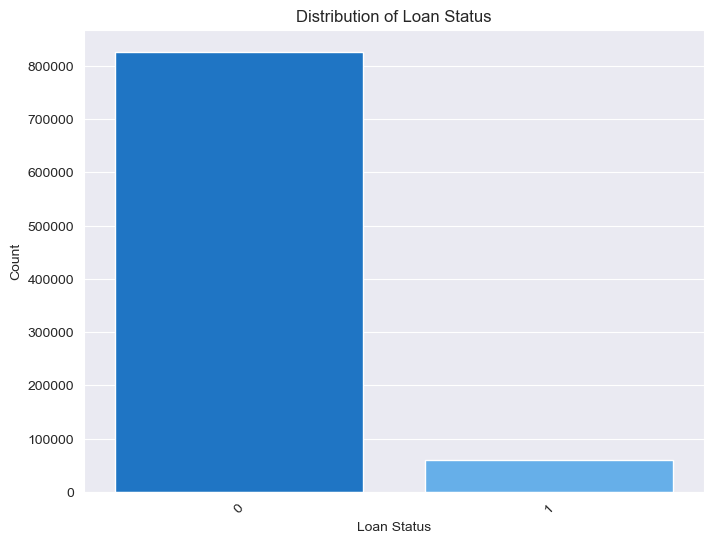

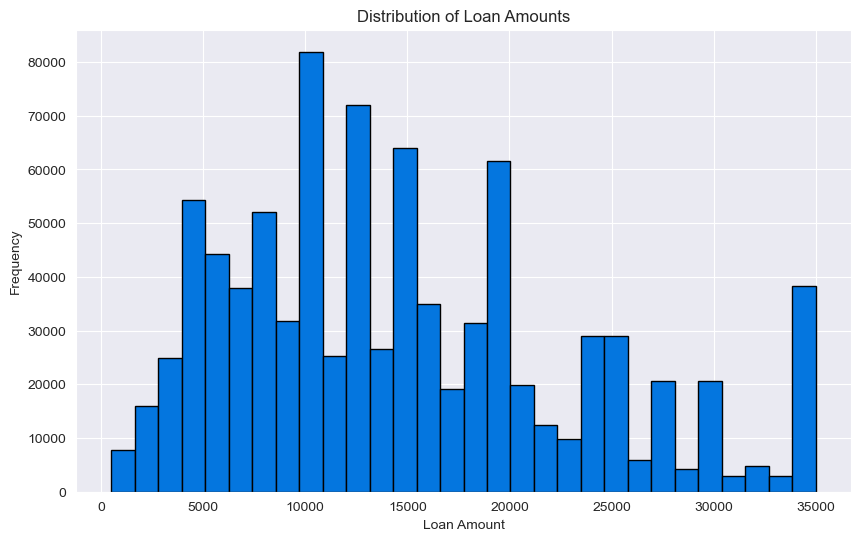

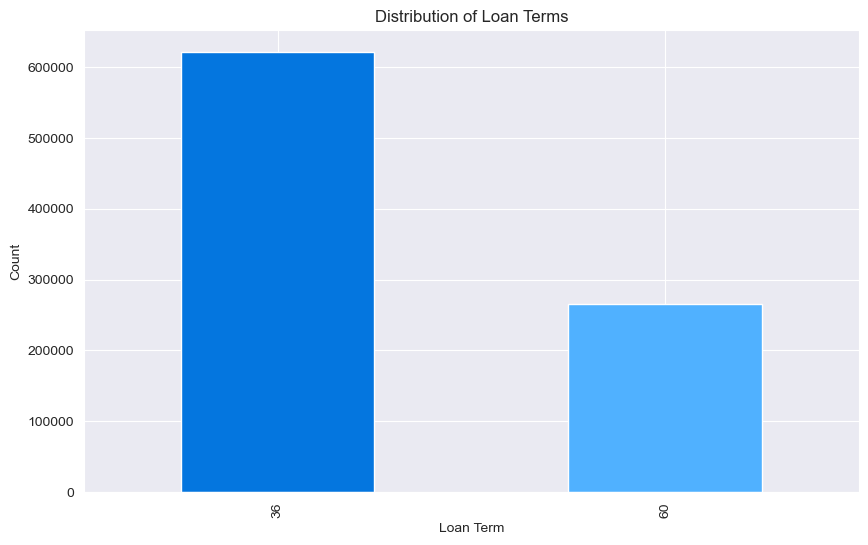

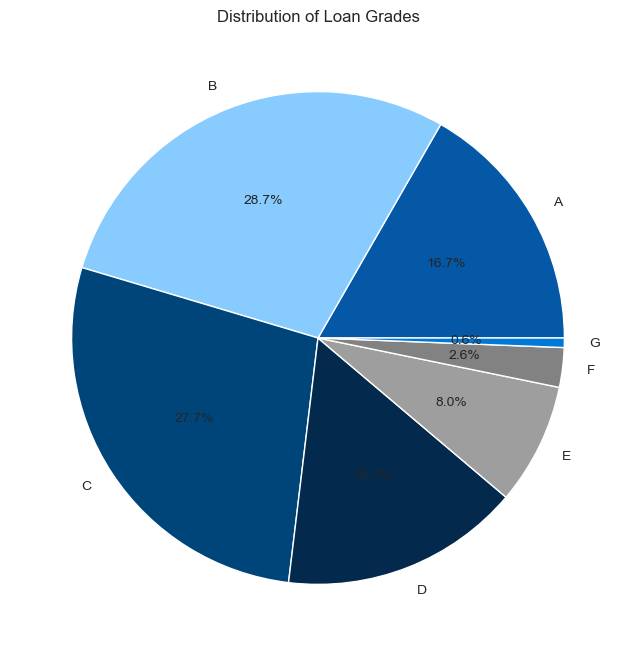

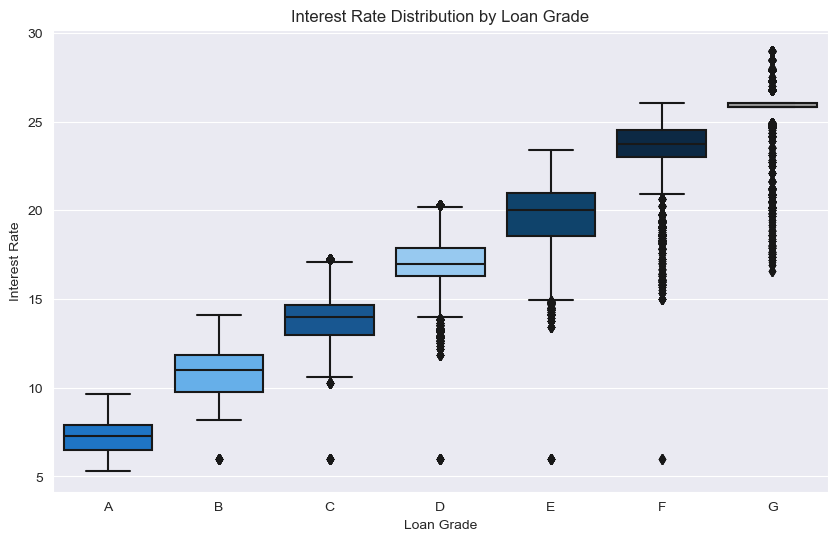

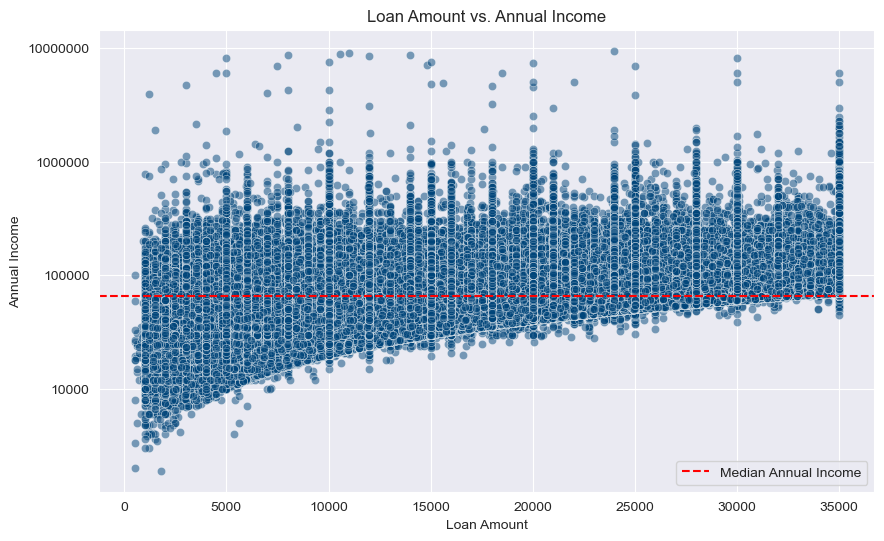

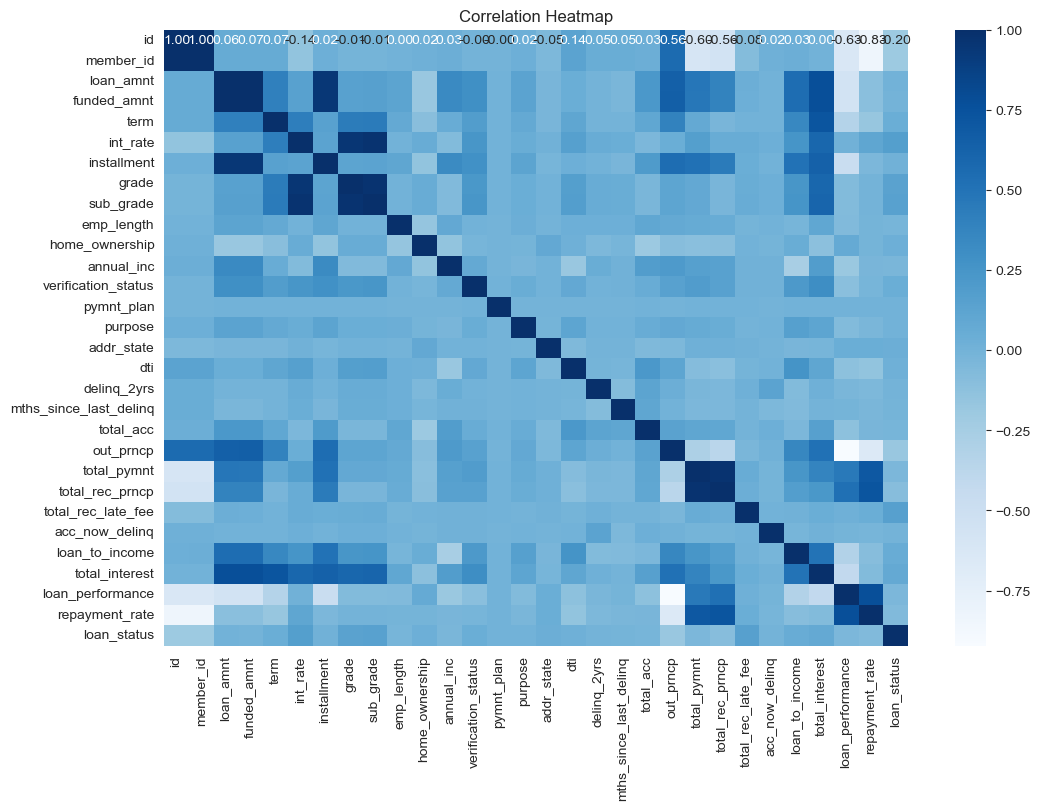

<Figure size 1000x600 with 0 Axes>

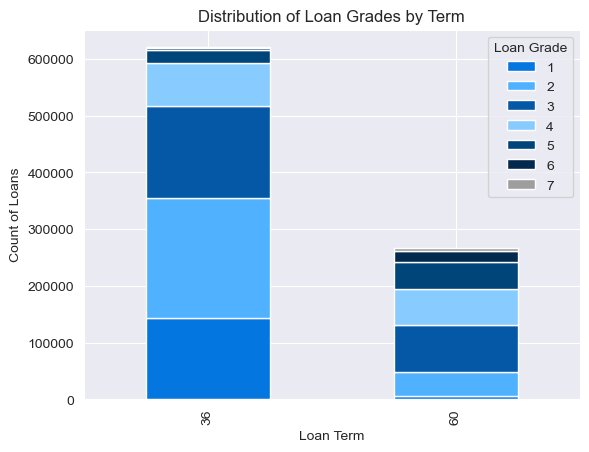

In [7]:

# Plot interest rate distribution by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_status', y='int_rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.title('Interest Rate Distribution by Loan Status')
plt.xticks(rotation=45)
plt.show()

# Plot loan purpose distribution by loan status
plt.figure(figsize=(12, 8))
sns.countplot(data=df_legacy, x='loan_status', hue='purpose', palette='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Purpose Distribution by Loan Status')
plt.xticks(rotation=45)
plt.legend(title='Loan Purpose', bbox_to_anchor=(1, 1))
plt.show()

# Plot debt-to-income ratio distribution by loan status
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='loan_status', y='dti')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.title('Debt-to-Income Ratio Distribution by Loan Status')
plt.xticks(rotation=45)
plt.show()

# Plot employment length distribution by loan status
plt.figure(figsize=(12, 8))
sns.countplot(data=df_legacy, x='loan_status', hue='emp_length', palette='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Employment Length Distribution by Loan Status')
plt.xticks(rotation=45)
plt.legend(title='Employment Length', bbox_to_anchor=(1, 1))
plt.show()

# Plot verification status distribution by loan status
plt.figure(figsize=(10, 6))
sns.countplot(data=df_legacy, x='loan_status', hue='verification_status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Verification Status Distribution by Loan Status')
plt.xticks(rotation=45)
plt.legend(title='Verification Status', bbox_to_anchor=(1, 1))
plt.show()

# Plot interest rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['int_rate'], kde=True)
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.title('Interest Rate Distribution')
plt.show()

# Plot annual income distribution with logarithmic x-axis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='annual_inc', kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Annual Income Distribution (Log Scale)')
plt.xscale('log')  # Set x-axis to logarithmic scale
# Customize tick labels on x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

plt.show()

# Plot debt-to-income ratio distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['dti'], kde=True)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Debt-to-Income Ratio Distribution')
plt.show()

# Plot loan purpose distribution
plt.figure(figsize=(12, 8))
sns.countplot(data=df_legacy, y='purpose', order=df_legacy['purpose'].value_counts().index, palette='Blues')
plt.xlabel('Count')
plt.ylabel('Loan Purpose')
plt.title('Distribution of Loan Purposes')
plt.show()

# Plot loan status distribution (target variable)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.xticks(rotation=45)
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['loan_amnt'], bins=30, color=colors[0], edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

# Bar Chart
plt.figure(figsize=(10, 6))
df['term'].value_counts().sort_index().plot(kind='bar', color=[colors[0], colors[1]])  # Specify two colors
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.title('Distribution of Loan Terms')
plt.show()


# Pie Chart
plt.figure(figsize=(8, 8))
grade_counts = df_legacy['grade'].value_counts()
grade_order = sorted(grade_counts.index)
grade_counts.loc[grade_order].plot(kind='pie', autopct='%1.1f%%', colors=colors[2:])
plt.title('Distribution of Loan Grades')
plt.ylabel('')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_legacy['grade'], y=df_legacy['int_rate'],order=['A','B','C','D','E','F','G'], palette=colors)
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Distribution by Loan Grade')
plt.show()

# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['loan_amnt'], y=df['annual_inc'], alpha=0.5, color=colors[4])
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.title('Loan Amount vs. Annual Income')
plt.yscale('log')
median_annual_inc = df['annual_inc'].median()
plt.axhline(y=median_annual_inc, color='red', linestyle='--', label='Median Annual Income')
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Stacked Bar Chart
plt.figure(figsize=(10, 6))
stacked_df_indv = df.groupby(['term', 'grade']).size().unstack()
stacked_df_indv.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Loan Term')
plt.ylabel('Count of Loans')
plt.title('Distribution of Loan Grades by Term')
plt.legend(title='Loan Grade')
plt.show()



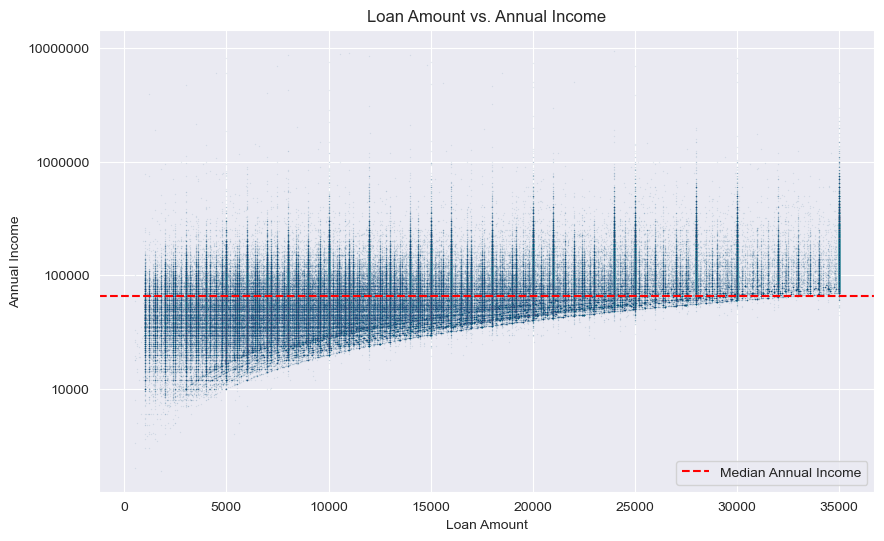

In [11]:
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['loan_amnt'], y=df['annual_inc'], alpha=0.1, color=colors[4], s=1)
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.title('Loan Amount vs. Annual Income')
plt.yscale('log')
median_annual_inc = df['annual_inc'].median()
plt.axhline(y=median_annual_inc, color='red', linestyle='--', label='Median Annual Income')
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()